In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading the data
df = pd.read_csv('/Productivity and Happiness Dataset.csv')
df.head()


,Happiness,Productivity
0,6.177343,343.311816
1,5.199127,249.457369
2,3.060723,97.723301
3,5.750739,300.303213
4,5.195999,248.628582


In [ ]:
# setting the feature and label and converting them to numpy
X=df['Happiness'].to_numpy()
Y=df['Productivity'].to_numpy()

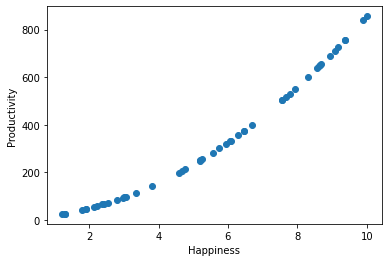

In [ ]:
# plot the data to see the type of data
import matplotlib.pyplot as plt
plt.xlabel('Happiness')
plt.ylabel('Productivity')
plt.scatter(X[1:50],Y[1:50]) # sees only a portion of dataset
# to see all data
#plt.scatter(X,Y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatureMakerObject = PolynomialFeatures(degree=2, include_bias=False) # if it is set to True, an extra column with 1 will come which we don't need

In [ ]:
print(X_train.shape)
print(X_test.shape)
# we notice that there's only one dimension

(319,)
(80,)


In [ ]:
X_train[0:10]

array([3.91188053, 3.13329825, 5.90010831, 2.01363663, 2.16414185,
       3.1568479 , 3.27445249, 9.58784922, 1.32844553, 4.19352558])

In [ ]:
X_train[0:10].reshape(10,1) 

array([[3.91188053],
       [3.13329825],
       [5.90010831],
       [2.01363663],
       [2.16414185],
       [3.1568479 ],
       [3.27445249],
       [9.58784922],
       [1.32844553],
       [4.19352558]])

In [ ]:
# So we need to reshape the array which can be processed
X_train=np.reshape(X_train,(X_train.shape[0],1))
X_test=np.reshape(X_test,(X_test.shape[0],1))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(319, 1)
(80, 1)


In [ ]:
X_train_polynomial = polynomialFeatureMakerObject.fit_transform(X_train)
X_test_polynomial = polynomialFeatureMakerObject.fit_transform(X_test)

In [ ]:
print(X_train_polynomial.shape)
print(X_test_polynomial.shape)

(319, 2)
(80, 2)


In [ ]:
X_train_polynomial

array([ 3.91188053, 15.30280932])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_polynomial, Y_train)

LinearRegression()

In [ ]:
# let us see how the equation variables are
print(lr.coef_)
print(lr.intercept_)

[4.96884832 8.00214548]
7.107428541489298


In [ ]:
Y_predicted = lr.predict(X_test_polynomial)

In [ ]:
print(f'X={X_test_polynomial[0]} and Y_predicted={Y_predicted[0]}')

X=[ 6.20808578 38.5403291 ] and Y_predicted=346.35978529428115


In [ ]:
# Now let us evaluate our model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_predicted)

print(f'The mean squared error of our model is {mse}')

The mean squared error of our model is 0.33558195571833616


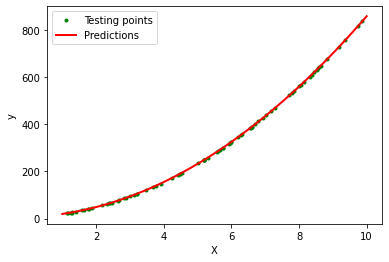

In [ ]:
X_new = np.linspace(1, 10, 200)
X_new=np.reshape(X_new,(200,1))
X_new_poly = polynomialFeatureMakerObject.transform(X_new)
y_new = lr.predict(X_new_poly)

plt.plot(X_test, Y_test, "g.",label='Testing points')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")


plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

What would have happened if we used linear regression?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],1))
X_test=np.reshape(X_test,(X_test.shape[0],1))

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(lr2.coef_)
print(lr2.intercept_)

[93.30963323]
-180.69637627961924


In [ ]:
Y_predicted = lr2.predict(X_test)

In [ ]:
# Now let us evaluate our model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_predicted)

print(f'The mean squared error of our model is {mse}')

The mean squared error of our model is 2303.656801319527


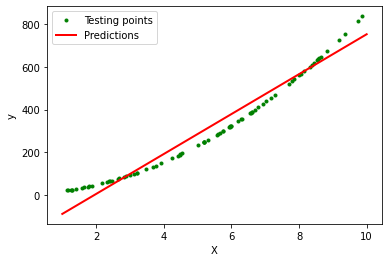

In [ ]:
X_new = np.linspace(1, 10, 200)
X_new=np.reshape(X_new,(200,1))
y_new = lr2.predict(X_new)

plt.plot(X_test, Y_test, "g.",label='Testing points')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")


plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/LuckWorkAndSuccess.csv')
df.head()

,Luck,Hardwork,Smartwork,Success
0,7.325368,3.684037,3.411925,4.312321
1,2.083510,2.035475,3.476075,2.975884
2,6.108617,9.871564,9.332810,9.630031
3,6.860826,6.349608,6.089833,6.641611
4,6.740754,5.543547,7.261306,6.557229


In [ ]:
X = df[['Luck', 'Hardwork','Smartwork']]
Y = df['Success']

In [ ]:
X=X.to_numpy()
Y=Y.to_numpy()

In [ ]:
print(X[0:5])
print(Y[0:5])

[[7.32536759 3.6840368  3.41192491]
 [2.08350961 2.03547542 3.47607518]
 [6.10861704 9.8715637  9.33281002]
 [6.86082574 6.34960804 6.08983305]
 [6.7407539  5.54354715 7.26130602]]
[4.31232111 2.97588411 9.63003127 6.6416106  6.55722886]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape)

(175, 3)


In [ ]:
lr3 = LinearRegression()
lr3.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print(lr3.coef_)
print(lr3.intercept_)

[0.20155872 0.38641587 0.40491031]
0.5114284771608766


In [ ]:
Y_predicted = lr3.predict(X_test)

In [ ]:
# Now let us evaluate our model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_predicted)

print(f'The mean squared error of our model is {mse}')

The mean squared error of our model is 0.07998785500933996
